In [88]:
import pandas as pd
import numpy as np
from clases.NeuronalNetwork import SimpleNeuralNetwork
from clases.Optimizer import SGDOptimizer, AdamOptimizer
from clases.Trainer import Trainer
from clases.LossFunction import *
from clases.ActivationFunction import *

import warnings
warnings.filterwarnings("ignore")

## MNIST Data

### Load Data

In [124]:
data = pd.read_csv('../datos/mnist_data.csv')
data = np.array(data)

### Split Data

In [125]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:], data_train[0].astype(int)
X_val, Y_val = data_validation[1:], data_validation[0].astype(int)
X_test, Y_test = data_test[1:], data_test[0].astype(int)

In [126]:
import matplotlib.pyplot as plt
def confusion_matrix(Y_test, Y_pred):
    # Número de clases (suponemos que sabemos la cantidad de clases)
    num_classes = np.max([Y_test.max(), Y_pred.max()]) + 1

    # Crear la matriz de confusión manualmente
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true_label, pred_label in zip(Y_test, Y_pred):
        conf_matrix[true_label, pred_label] += 1

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, cmap="Blues")
    plt.colorbar()
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Añadir anotaciones en cada celda
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

    plt.show()

In [127]:
def predict(X, model):
    # Forward pass para obtener las predicciones
    model.forward(X)
    return np.argmax(model.A2, axis=0)

### Train Data

#### SGD Optimizer

In [93]:
model = SimpleNeuralNetwork(input_size=784, output_size=10, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = SGDOptimizer(learning_rate=0.001)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.20s | val loss 2.324 | valid accuracy 0.097 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.23s | val loss 2.156 | valid accuracy 0.203 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.20s | val loss 1.937 | valid accuracy 0.309 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.18s | val loss 1.586 | valid accuracy 0.461 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.17s | val loss 1.178 | valid accuracy 0.658 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.28s | val loss 0.928 | valid accuracy 0.719 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.25s | val loss 0.795 | valid accuracy 0.758 |
----------------------------------

In [94]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8383333333333334


In [95]:
confusion_matrix(Y_test, Y_pred)

array([[375.,   0.,   4.,   5.,   1.,   7.,   4.,   3.,   2.,   2.],
       [  0., 480.,   1.,   2.,   0.,   2.,   1.,   1.,   6.,   0.],
       [  7.,  10., 346.,   4.,   6.,   4.,  15.,  11.,  16.,   1.],
       [  6.,   7.,  15., 293.,   1.,  62.,   2.,   7.,  35.,   1.],
       [  4.,   2.,   7.,   0., 376.,   0.,   8.,   1.,   1.,  12.],
       [  4.,   3.,   4.,  20.,  11., 288.,  10.,   0.,  25.,   5.],
       [  2.,   2.,  12.,   0.,   6.,   6., 378.,   0.,   5.,   0.],
       [  2.,   8.,   8.,   2.,   3.,   0.,   0., 389.,   4.,  25.],
       [  2.,   7.,   6.,   6.,   7.,  17.,   6.,   0., 327.,   8.],
       [  6.,   3.,   2.,   4., 100.,   7.,   0.,  33.,  12., 269.]])

#### Adam Optimizer

In [128]:
model = SimpleNeuralNetwork(input_size=784, output_size=10, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = AdamOptimizer(learning_rate=0.001)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.19s | val loss 2.189 | valid accuracy 0.235 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.20s | val loss 0.764 | valid accuracy 0.742 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.19s | val loss 0.471 | valid accuracy 0.855 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.18s | val loss 0.391 | valid accuracy 0.889 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.23s | val loss 0.347 | valid accuracy 0.902 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.20s | val loss 0.319 | valid accuracy 0.905 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.22s | val loss 0.301 | valid accuracy 0.910 |
----------------------------------

In [129]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9292857142857143


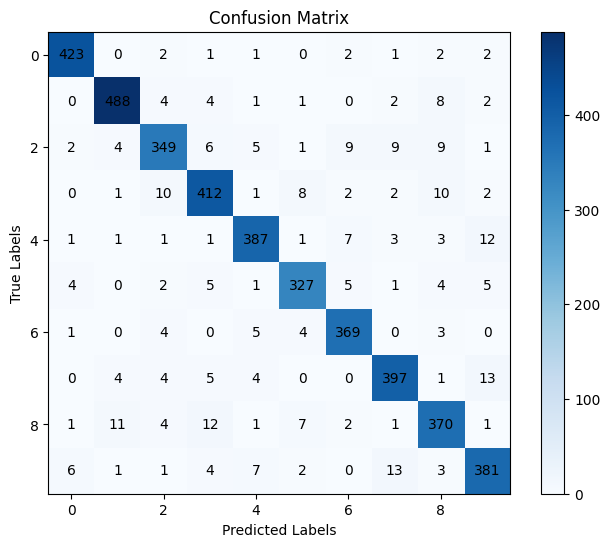

In [130]:
confusion_matrix(Y_test, Y_pred)

## Iris Data

### Load the Data

In [113]:
data = pd.read_csv('../datos/Iris.csv')
data = np.array(data)

### Label Encoder

In [114]:
target_column = data[:, -1]

unique_classes, encoded_labels = np.unique(target_column, return_inverse=True)

data[:, -1] = encoded_labels

### Standard Scaler

In [115]:
features = data[:, :-1].astype(np.float64)

means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

data[:, :-1] = scaled_features

### Split Data

In [116]:
m, n = data.shape
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[:-1].astype(np.float64), data_train[-1].astype(int)
X_val, Y_val = data_validation[:-1].astype(np.float64), data_validation[-1].astype(int)
X_test, Y_test = data_test[:-1].astype(np.float64), data_test[-1].astype(int)

### Train Data

#### SGDOptimizer

In [117]:
model = SimpleNeuralNetwork(input_size=4, output_size=3, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = SGDOptimizer(learning_rate=1)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.00s | val loss 1.096 | valid accuracy 0.467 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.00s | val loss 0.799 | valid accuracy 0.667 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.00s | val loss 0.628 | valid accuracy 0.733 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.00s | val loss 0.594 | valid accuracy 0.733 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.00s | val loss 0.578 | valid accuracy 0.733 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.00s | val loss 0.564 | valid accuracy 0.800 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.00s | val loss 0.501 | valid accuracy 0.933 |
----------------------------------

In [118]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


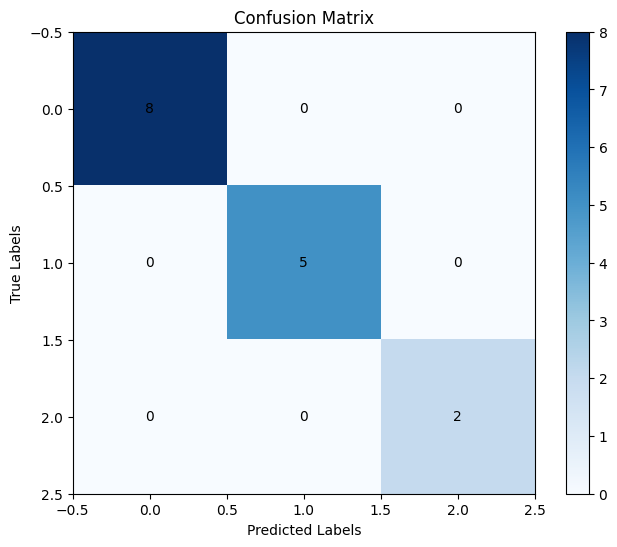

In [119]:
confusion_matrix(Y_test, Y_pred)

#### AdamOptimizer

In [120]:
model = SimpleNeuralNetwork(input_size=4, output_size=3, activation_function=relu, activation_function_d=relu_derivative, output_function=softmax)
optimizer = AdamOptimizer(learning_rate=0.1)
trainer = Trainer(model, optimizer, cross_entropy_loss)
trainer.train(X_train, Y_train,X_val,Y_val, epochs=130)

--------------------------------------------------------------------
| Epoch   0 | time:  0.00s | val loss 1.065 | valid accuracy 0.467 |
--------------------------------------------------------------------
| Epoch  10 | time:  0.00s | val loss 0.350 | valid accuracy 0.933 |
--------------------------------------------------------------------
| Epoch  20 | time:  0.00s | val loss 0.115 | valid accuracy 0.933 |
--------------------------------------------------------------------
| Epoch  30 | time:  0.00s | val loss 0.056 | valid accuracy 1.000 |
--------------------------------------------------------------------
| Epoch  40 | time:  0.00s | val loss 0.065 | valid accuracy 1.000 |
--------------------------------------------------------------------
| Epoch  50 | time:  0.00s | val loss 0.063 | valid accuracy 1.000 |
--------------------------------------------------------------------
| Epoch  60 | time:  0.00s | val loss 0.051 | valid accuracy 1.000 |
----------------------------------

In [121]:
# Haz pruebas para el conjunto de prueba
Y_pred = predict(X_test, model)
accuracy = np.mean(Y_pred == Y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


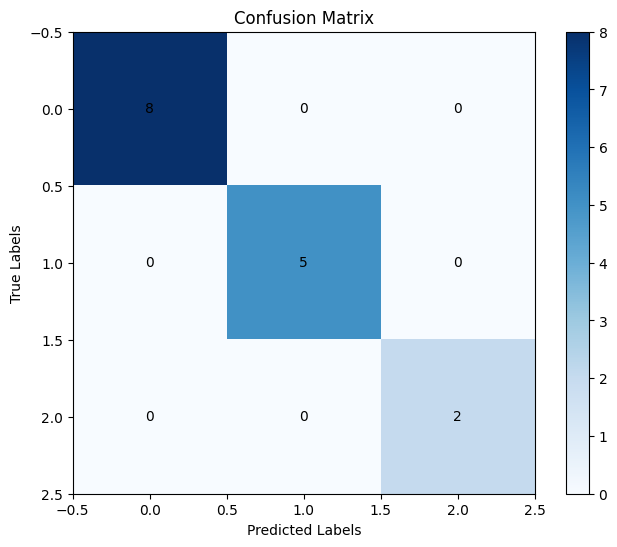

In [122]:
confusion_matrix(Y_test, Y_pred)